In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [41]:
pf = pd.read_csv('../Data/mean_data.csv')
print(pf)

     Unnamed: 0   ID Annotater     video id  Attractive Level (1-5)  \
0             1    1  nghiatnh  5OzrpNCyXqs                     5.0   
1             2    2   hoangnd  5OzrpNCyXqs                     5.0   
2            11   11      hanl  3qfTtx3yG5U                     4.0   
3            15   15  nghiatnh  rSTBg8w7F8I                     3.0   
4            16   16      hanl  rSTBg8w7F8I                     3.0   
..          ...  ...       ...          ...                     ...   
271         828  786     haitm  UVasq9dkass                     2.0   
272         833  791     haitm  9eia-UYOTCg                     3.0   
273         837  795     haitm  4SB9AHOW7X0                     3.0   
274         841  799     haitm  y0E-cGIhcDo                     5.0   
275         845  803     haitm  qXNpAaB51U0                     2.0   

     Question 2: Sound (1-5)  Question 2.1: Music (1-5)  \
0                        5.0                          4   
1                        5.0 

<AxesSubplot:xlabel='Attractive Level (1-5)', ylabel='Count'>

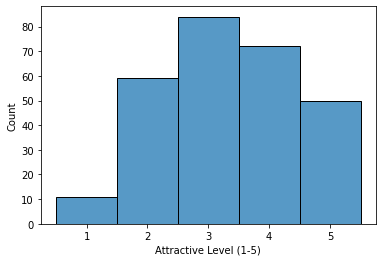

In [42]:
sns.histplot(pf['Attractive Level (1-5)'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])

In [43]:
# for x in pf.columns:
#     try:
#         plt.plot(pf[x],pf["Attractive Level (1-5)"], 'ro')
#         plt.show()
#     except:
#         pass

In [44]:
columns = [
       'Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)',
       'Question 2.2 : Noise control (1-5)',
       'Question 2.3 : Speaking Style (1-5)', 'Question 3: Camera (1-5)',
       'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)', 'Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)']
core_columns = [
       'Question 2: Sound (1-5)','Question 3: Camera (1-5)',
       'Question 4: Images (1-5)', 'Question 5: Content (1-5)',
       'Question 6: Reviewer (1-5)',]
output_column = 'Attractive Level (1-5)'

In [45]:
X_train, X_test, y_train, y_test = train_test_split(pf[columns][:], pf[output_column][:], test_size=0.2, shuffle=False)
print(X_train.shape)
print(X_test.shape)

(220, 17)
(56, 17)


In [46]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train)
print('Decision tree:')
print('train accuracy: ',clf.score(X_train, y_train))
print('test accuracy: ',clf.score(X_test, y_test))

Decision tree:
train accuracy:  0.759090909090909
test accuracy:  0.6607142857142857


In [47]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1, solver="lbfgs", multi_class = 'multinomial', max_iter=1e4)
clf.fit(X_train, y_train)
print('Softmax Regression:')

print('train accuracy: ',clf.score(X_train, y_train))
print('test accuracy: ',clf.score(X_test, y_test))

Softmax Regression:
train accuracy:  0.7681818181818182
test accuracy:  0.8035714285714286


In [48]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(100,))
clf.fit(X_train, y_train)
print('Multilayer Perceptron:')

print('train accuracy: ',clf.score(X_train, y_train))
print('test accuracy: ',clf.score(X_test, y_test))

Multilayer Perceptron:
train accuracy:  0.7772727272727272
test accuracy:  0.5535714285714286


/home/nghiatnh/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [49]:
from sklearn.svm import SVC
clf = SVC(C=1)
clf.fit(X_train, y_train)
print('Support Vector Machine:')

print('train accuracy: ',clf.score(X_train, y_train))
print('test accuracy: ',clf.score(X_test, y_test))


Support Vector Machine:
train accuracy:  0.7454545454545455
test accuracy:  0.8392857142857143


In [50]:
def DC():
    clf = tree.DecisionTreeClassifier(max_depth = 5)
    clf.fit(X_train, y_train)
    return (clf.score(X_train, y_train), clf.score(X_test, y_test))

def SR():
    clf = LogisticRegression(C=1, solver="lbfgs", multi_class = 'multinomial', max_iter=1000)
    clf.fit(X_train, y_train)
    return (clf.score(X_train, y_train), clf.score(X_test, y_test))

def MLP():
    clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=(100,))
    clf.fit(X_train, y_train)
    return (clf.score(X_train, y_train), clf.score(X_test, y_test))

def SVM():
    clf = SVC(C=1)
    clf.fit(X_train, y_train)
    return (clf.score(X_train, y_train), clf.score(X_test, y_test))

In [51]:
N = 10
ls_train = []
ls_test = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(pf[columns][:], pf[output_column][:], test_size=0.2, shuffle=True)
    D = [DC(), SR(), MLP(), SVM()]
    ls_train.append([x[0] for x in D])
    ls_test.append([x[1] for x in D])
print('Decision Tree - Softmax Regression - Multilayer Perceptron - Support Vector Machine')
print('train accuracy: ', np.mean(ls_train, axis=0))
print('test accuracy: ', np.mean(ls_test, axis=0))

/home/nghiatnh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nghiatnh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Decision Tree - Softmax Regression - Multilayer Perceptron - Support Vector Machine
train:  [0.81318182 0.80727273 0.82727273 0.76318182]
test:  [0.61785714 0.68035714 0.62857143 0.68928571]
